# import

In [1]:
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd 
from os import path

In [3]:
import taproc as tp
from taproc.pre_processing import *
from taproc.dataset import *
from taproc.learner import *
from taproc.feature import *

# read file

In [7]:
file_path = Path('/home_credit_default_risk/data')

In [8]:
app_train = pd.read_csv(str(file_path/'application_train.csv'))

In [9]:
app_train_proc, y, na_dict = tabular_proc(app_train, y_fld = 'TARGET', max_n_cat=15)

In [10]:
app_test = pd.read_csv(str(file_path/'application_test.csv'))

In [11]:
app_test_proc, _, _ = tabular_proc(app_test, max_n_cat=15, na_dict = na_dict)

In [12]:
app_train_proc = app_train_proc[app_test_proc.columns]

# train test split from sklearn

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_trn, x_val, y_trn, y_val = train_test_split(app_train_proc, y, test_size=0.2, stratify = y)

In [17]:
dataset = LGBDataset(x_trn, y_trn, x_val, y_val)

# baseline model

In [90]:
params = {
    'task': 'train',
    'objective': 'binary',
    'n_estimators':500,
    'learning_rate':0.01,
    'num_leaves':30,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.1,
    'reg_lambda':.1,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':-1,
    'metric': 'binary_logloss'}

In [91]:
learner = LGBLearner(dataset)

In [ ]:
learner.fit(params, early_stopping_rounds=50)

# dendrogram

In [65]:
ddg = dendogram.from_df(x_trn)

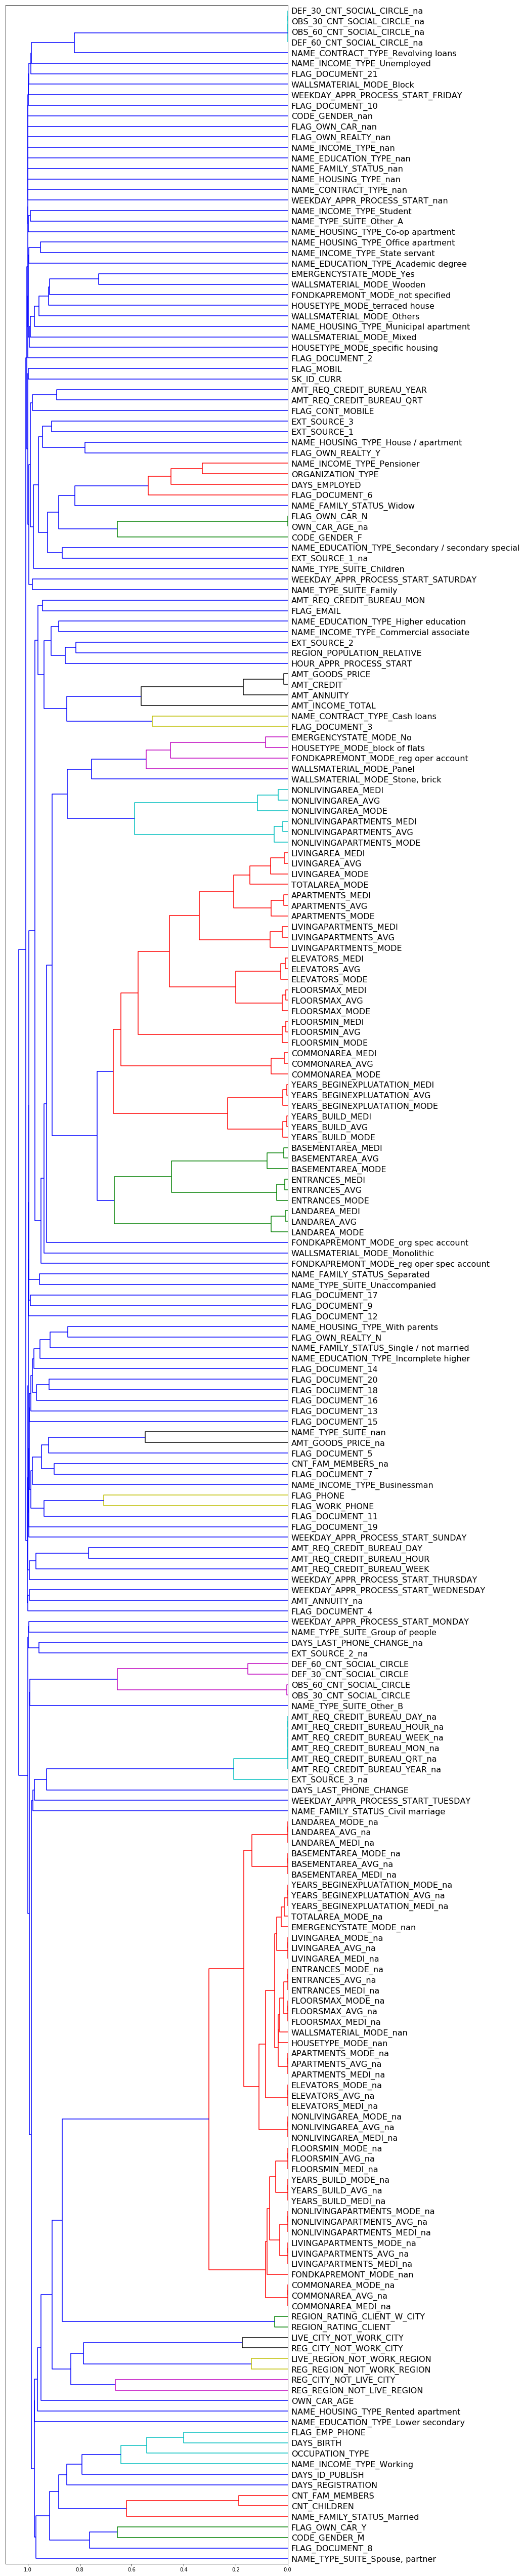

In [66]:
ddg.plot()

In [ ]:
ddg.result.head(10)

In [83]:
col_group = [['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
             ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
             ['EMERGENCYSTATE_MODE_No', 'HOUSETYPE_MODE_block of flats'],
             ['NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI'],
             ['NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI'],
             ['LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE','TOTALAREA_MODE'],
             ['APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE'],
             ['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI'],
             ['ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE'],
             ['FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE'],
             ['FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE'],
             ['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE'],
             ['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE'],
             ['YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE'],
             ['BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE'],
             ['ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE'],
             ['LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI'],
             ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
             ['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'],
             ['LANDAREA_AVG_na', 'LANDAREA_MODE_na','LANDAREA_MEDI_na'],
             ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
             ['AMT_REQ_CREDIT_BUREAU_HOUR_na', 'AMT_REQ_CREDIT_BUREAU_DAY_na', 
              'AMT_REQ_CREDIT_BUREAU_WEEK_na', 'AMT_REQ_CREDIT_BUREAU_MON_na', 
              'AMT_REQ_CREDIT_BUREAU_QRT_na', 'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
             ['LANDAREA_AVG_na', 'LANDAREA_MODE_na', 'LANDAREA_MEDI_na'],
             ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
             ['YEARS_BEGINEXPLUATATION_AVG_na', 'YEARS_BEGINEXPLUATATION_MODE_na', 
              'YEARS_BEGINEXPLUATATION_MEDI_na', 'TOTALAREA_MODE_na', 'EMERGENCYSTATE_MODE_nan'],
             ['LIVINGAREA_AVG_na', 'LIVINGAREA_MODE_na', 'LIVINGAREA_MEDI_na'],
             ['ENTRANCES_AVG_na', 'ENTRANCES_MODE_na', 'ENTRANCES_MEDI_na',
              'FLOORSMAX_AVG_na', 'FLOORSMAX_MODE_na', 'FLOORSMAX_MEDI_na', 'WALLSMATERIAL_MODE_nan'],
             ['APARTMENTS_AVG_na', 'APARTMENTS_MODE_na', 'APARTMENTS_MEDI_na', 'HOUSETYPE_MODE_nan'],
             ['ELEVATORS_AVG_na', 'ELEVATORS_MODE_na', 'ELEVATORS_MEDI_na'],
             ['NONLIVINGAREA_AVG_na', 'NONLIVINGAREA_MODE_na', 'NONLIVINGAREA_MEDI_na'],
             ['FLOORSMIN_AVG_na', 'FLOORSMIN_MODE_na', 'FLOORSMIN_MEDI_na'],
             ['YEARS_BUILD_AVG_na', 'YEARS_BUILD_MODE_na', 'YEARS_BUILD_MEDI_na'],
             ['NONLIVINGAPARTMENTS_AVG_na', 'NONLIVINGAPARTMENTS_MODE_na', 'NONLIVINGAPARTMENTS_MEDI_na'],
             ['LIVINGAPARTMENTS_AVG_na', 'LIVINGAPARTMENTS_MODE_na', 'LIVINGAPARTMENTS_MEDI_na'],
             ['COMMONAREA_AVG_na', 'COMMONAREA_MODE_na', 'COMMONAREA_MEDI_na'],
             ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']]

In [84]:
col_group = col_group + [i for i in x_trn.columns if i not in flat_list(col_group)]

In [85]:
col_group

[['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
 ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
 ['EMERGENCYSTATE_MODE_No', 'HOUSETYPE_MODE_block of flats'],
 ['NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI'],
 ['NONLIVINGAPARTMENTS_MODE',
  'NONLIVINGAPARTMENTS_AVG',
  'NONLIVINGAPARTMENTS_MEDI'],
 ['LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'TOTALAREA_MODE'],
 ['APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE'],
 ['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI'],
 ['ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE'],
 ['FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE'],
 ['FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE'],
 ['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE'],
 ['YEARS_BEGINEXPLUATATION_AVG',
  'YEARS_BEGINEXPLUATATION_MEDI',
  'YEARS_BEGINEXPLUATATION_MODE'],
 ['YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE'],
 ['BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE'],
 ['ENTRANCES_AVG', 'ENTR

# feature importance

In [93]:
impt = importance.from_LGBLearner(learner, col_group)

In [94]:
impt.I[:5]

,Feature,Importance
62,EXT_SOURCE_3,0.072817
61,EXT_SOURCE_2,0.055410
60,EXT_SOURCE_1,0.016629
1,AMT_GOODS_PRICE & AMT_CREDIT & AMT_ANNUITY,0.010259
40,DAYS_BIRTH,0.004709


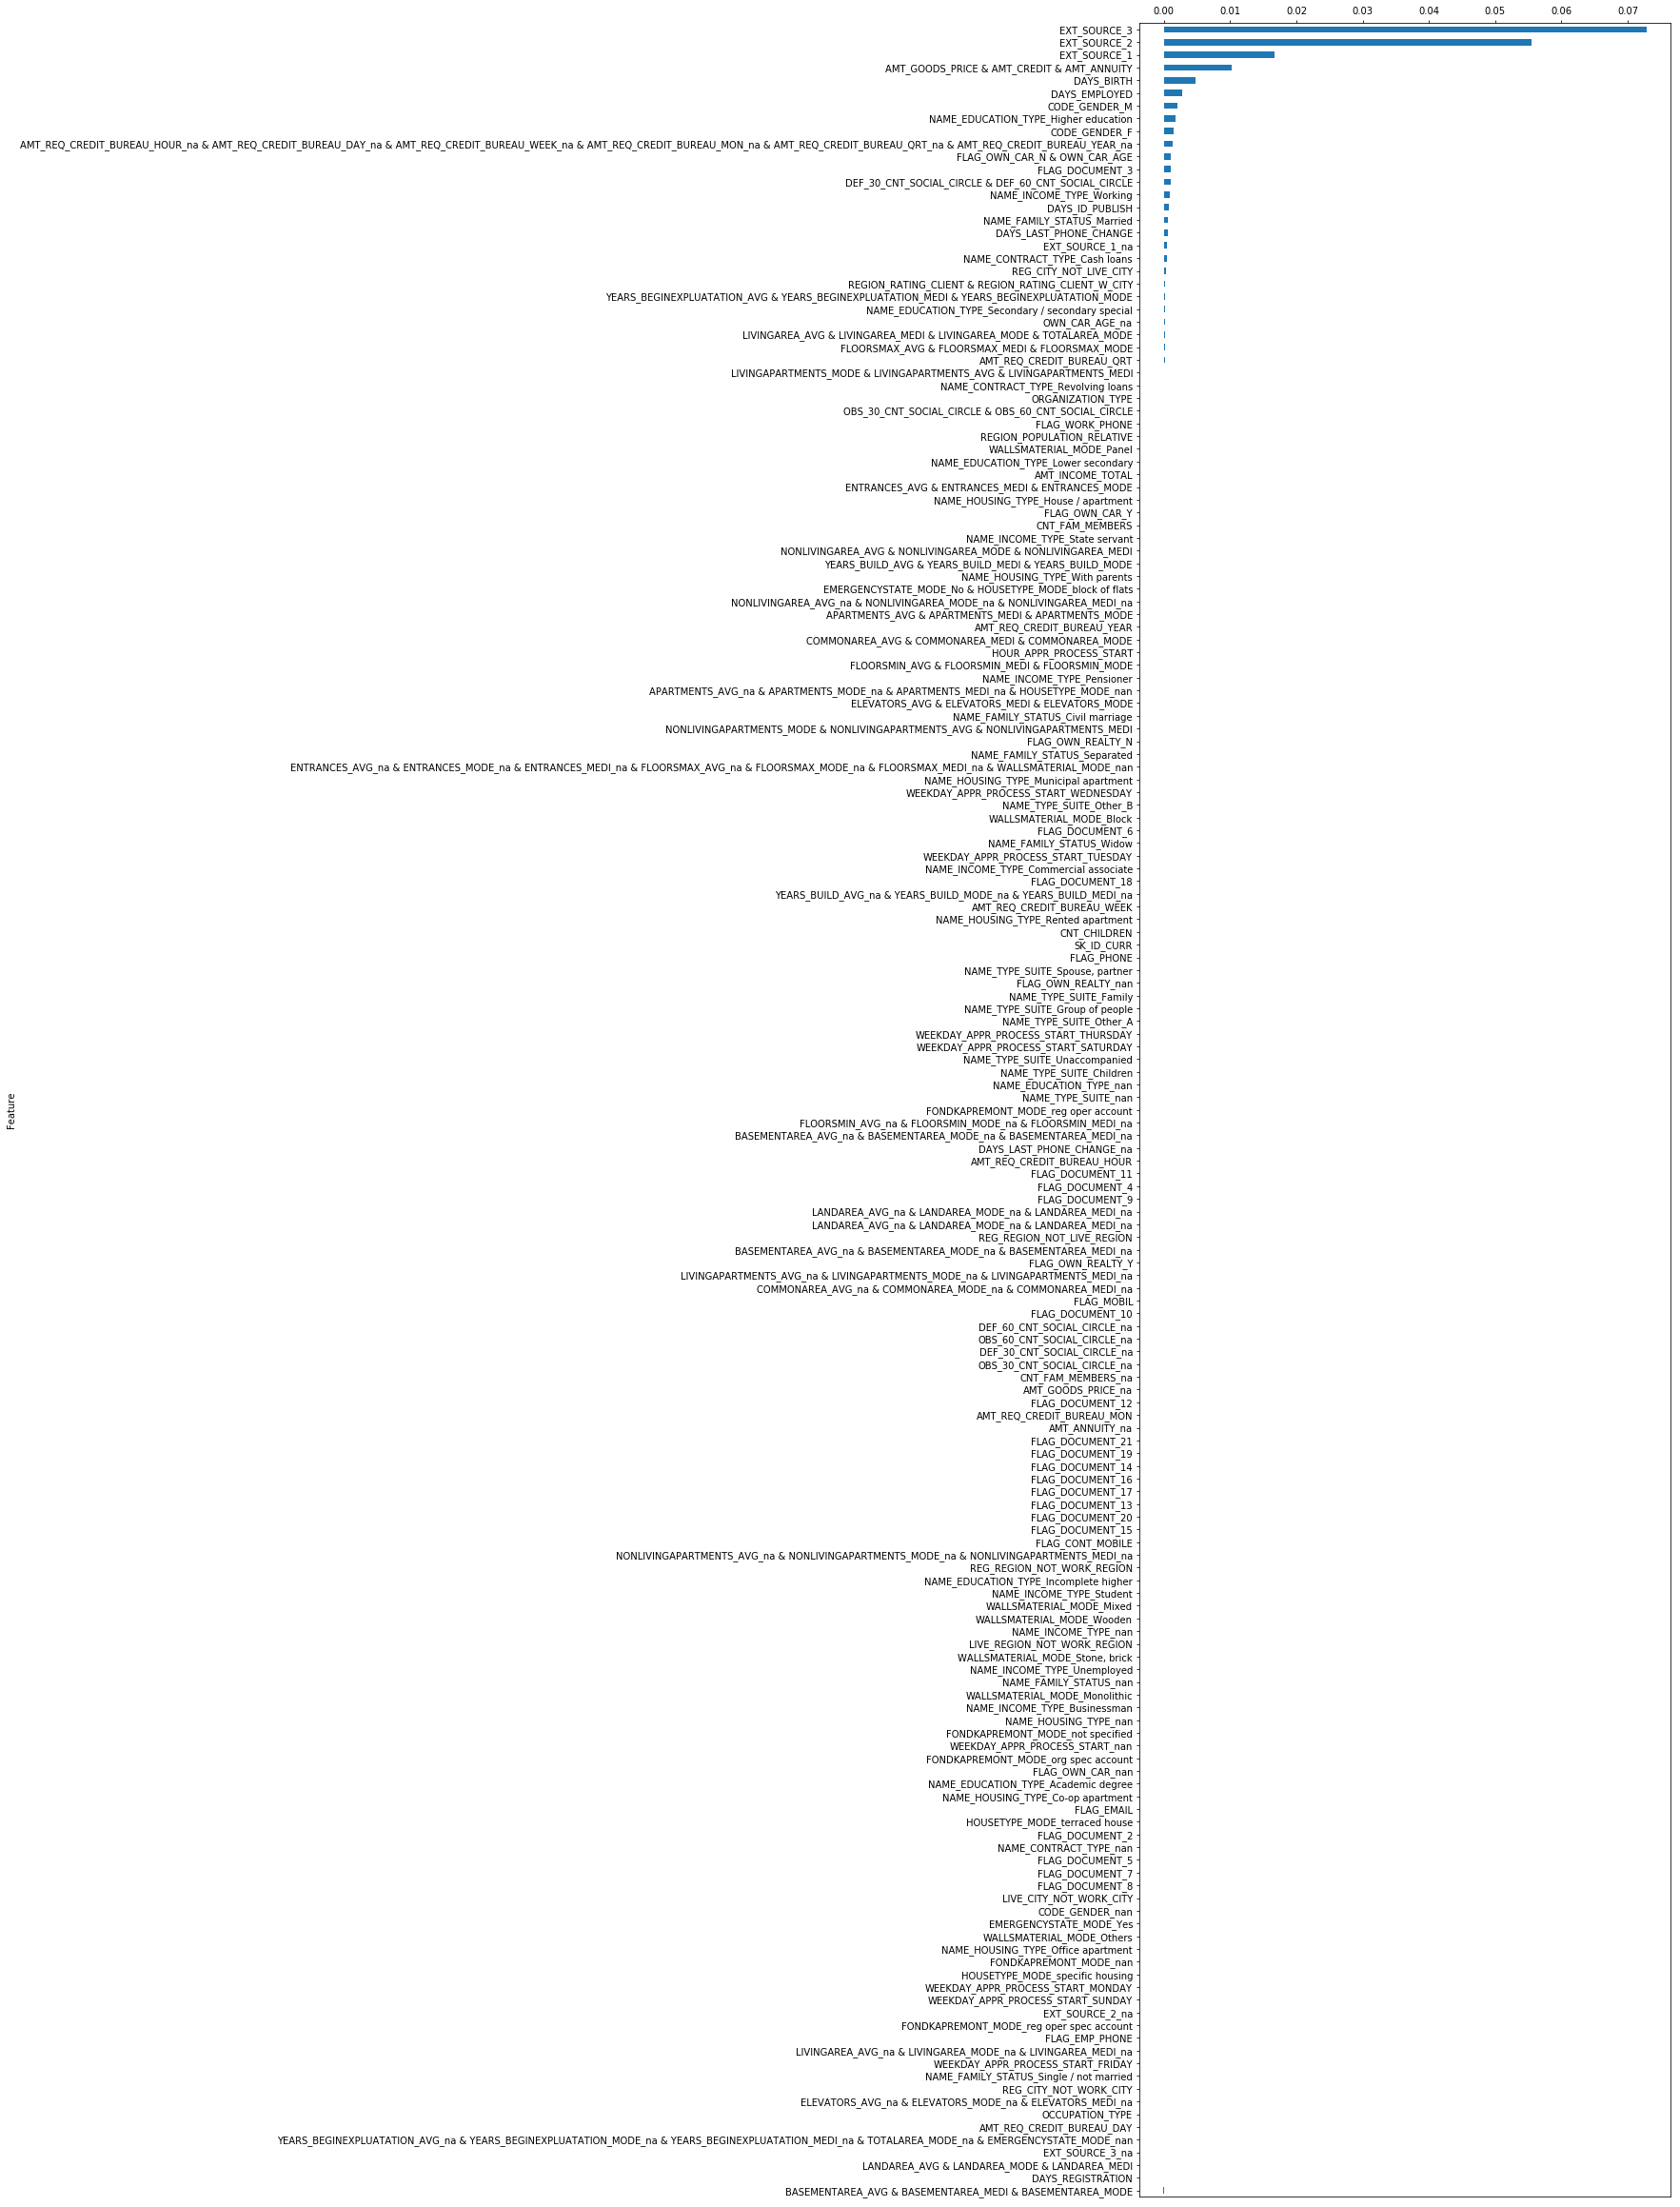

In [95]:
impt.plot()

In [112]:
impt.top(27)

[['EXT_SOURCE_3'],
 ['EXT_SOURCE_2'],
 ['EXT_SOURCE_1'],
 ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
 ['DAYS_BIRTH'],
 ['DAYS_EMPLOYED'],
 ['CODE_GENDER_M'],
 ['NAME_EDUCATION_TYPE_Higher education'],
 ['CODE_GENDER_F'],
 ['AMT_REQ_CREDIT_BUREAU_HOUR_na',
  'AMT_REQ_CREDIT_BUREAU_DAY_na',
  'AMT_REQ_CREDIT_BUREAU_WEEK_na',
  'AMT_REQ_CREDIT_BUREAU_MON_na',
  'AMT_REQ_CREDIT_BUREAU_QRT_na',
  'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
 ['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
 ['FLAG_DOCUMENT_3'],
 ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
 ['NAME_INCOME_TYPE_Working'],
 ['DAYS_ID_PUBLISH'],
 ['NAME_FAMILY_STATUS_Married'],
 ['DAYS_LAST_PHONE_CHANGE'],
 ['EXT_SOURCE_1_na'],
 ['NAME_CONTRACT_TYPE_Cash loans'],
 ['REG_CITY_NOT_LIVE_CITY'],
 ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],
 ['YEARS_BEGINEXPLUATATION_AVG',
  'YEARS_BEGINEXPLUATATION_MEDI',
  'YEARS_BEGINEXPLUATATION_MODE'],
 ['NAME_EDUCATION_TYPE_Secondary / secondary special'],
 ['OWN_CAR_AGE_na'],
 ['LIVIN

In [ ]:
keep_ft = flat_list(impt.top(27))

In [ ]:
x_tst_keep = app_test_proc[keep_ft]
app_train_keep = app_train_proc[keep_ft]

# split dataset

In [301]:
cons, cats = get_cons_cats(app_train_keep)

In [302]:
tst_key = x_tst_keep[cats].drop_duplicates().values
tst_key = set('~'.join([str(j) for j in i]) for i in tst_key)
app_key = app_train_keep[cats].apply(lambda x: '~'.join([str(j) for j in x.values]), axis=1)

In [303]:
mask = app_key.isin(tst_key)
x_trn = app_train_keep[~mask]
y_trn = y[~mask]
x_val_set = app_train_keep[mask]
y_val_set = y[mask]

In [304]:
def random_choose(x, pct = 2, ratio = 0.2, **kargs):
    n = x.shape[0] if random.randint(0,9) < pct else int(np.round(x.shape[0]*(ratio-0.06)))
    return x.sample(n=n, **kargs)

In [305]:
x_val = x_val_set.groupby(cats).apply(random_choose)
val_index = set([i[-1] for i in x_val.index.values])
x_val.reset_index(drop=True, inplace=True)

In [306]:
mask = x_val_set.index.isin(val_index)
y_val = y_val_set[mask]
x_trn = pd.concat([x_trn, val_set[~mask]])

# describe

In [261]:
cons[:5]

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'AMT_GOODS_PRICE',
 'AMT_CREDIT']

In [262]:
cats[:5]

['CODE_GENDER_M',
 'NAME_EDUCATION_TYPE_Higher education',
 'CODE_GENDER_F',
 'AMT_REQ_CREDIT_BUREAU_HOUR_na',
 'AMT_REQ_CREDIT_BUREAU_DAY_na']

In [307]:
x_val_set.shape

(248120, 44)

In [265]:
list(tst_key)[:5]

['1~0~0~True~True~True~True~True~True~0~0~0.0~0.0~0~1~True~0~0~2~2~1~False~0.1667~0.0',
 '0~0~1~False~False~False~False~False~False~1~1~0.0~0.0~1~0~True~1~0~2~2~0~True~0.1667~0.0',
 '1~1~0~False~False~False~False~False~False~0~1~0.0~0.0~0~1~False~1~0~2~2~0~False~0.125~0.0',
 '1~0~0~False~False~False~False~False~False~0~1~1.0~1.0~0~1~False~1~0~1~1~1~False~0.0417~0.0',
 '1~0~0~True~True~True~True~True~True~1~1~1.0~0.0~1~0~True~1~0~2~2~0~True~0.1667~0.0']

In [294]:
val_index[:5]

[264913, 50074, 209922, 285119, 140840]